Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [0]:
import tensorflow as tf
import os
import zipfile
import urllib
urllib.request.urlretrieve("https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip",
                           filename="/tmp/happy-or-sad.zip")

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [0]:
train_happy_dir = os.path.join('/tmp/h-or-s/happy')
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

(150, 150, 4)


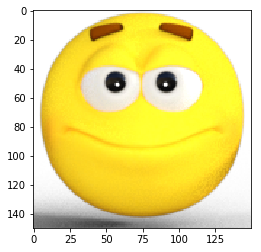

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
sample_img = mpimg.imread(os.path.join(train_happy_dir, 'happy1-00.png'))
print(sample_img.shape)

plt.imshow(sample_img)
plt.show()

In [0]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):  # your code):
        # Your Code
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>DESIRED_ACCURACY):
                print("\nReached " + str(DESIRED_ACCURACY) + " accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model
    model = tf.keras.models.Sequential([
        # Your Code Here
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])  # Your Code Here #)
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)  # Your Code Here

    train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')  # Your Code Here)
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator(train_generator,
        steps_per_epoch=1,
        epochs=100,
        verbose=1,
        callbacks=[callbacks])  # Your Code Here)
    # model fitting
    return history.history['acc'][-1]

In [14]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/100
1/1 [==============================] - 1s 686ms/step - loss: 0.6911 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 2.3878 - acc: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 132ms/step - loss: 1.4575 - acc: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 191ms/step - loss: 0.6881 - acc: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 199ms/step - loss: 0.6715 - acc: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 200ms/step - loss: 0.6519 - acc: 0.6750
Epoch 7/100
1/1 [==============================] - 0s 188ms/step - loss: 0.6182 - acc: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 194ms/step - loss: 0.5741 - acc: 0.6875
Epoch 9/100
1/1 [==============================] - 0s 196ms/step - loss: 0.4944 - acc: 0.9500
Epoch 10/100
1/1 [==============================] - 0s 200ms/step - loss: 0.4016 - acc: 0.7500
Epoch 11/100
1/1 [==

1.0